# Classificação: k-vizinhos mais próximos

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons<br>
Caso queira usar em suas aulas, citar a fonte: https://github.com/franciscoicmc

<hr>

Inicialmente, vamos implementar o método dos k-vizinhos mais próximos. Vamos também considerar um exemplo simples.

Classes: ['gray', 'white', 'white']
Classification: white


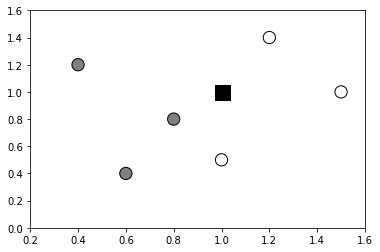

In [36]:
from scipy.spatial import distance
import statistics
import matplotlib.pyplot as plt
import numpy as np

def knn(x_train, y_train, x_test, k):
    distances = [] #lista que armazena as distâncias
    x1 = x_test # elemento a ser classificado
    for x2 in x_train: # distancia entre a observacao elementos no conjunto de teste
        dist = distance.euclidean(x1,x2)
        distances.append(dist)
    indices = []
    cl = []
    for i in range(0,k):
        ind = np.argmin(distances) #elemento no conjunto de teste mais proximo
        #print('distance:', distances[ind],'index:', ind, 'class:', y_train[ind])
        distances[ind] = np.max(distances) 
        indices.append(ind)
        cl.append(y_train[ind]) #guarda a classe
    print("Classes:",cl)
    classification = statistics.mode(cl)# encontra a classe
    return classification

k=3 # numero de vizinhos
x_train = np.array([[1,0.5],[0.8,0.8],[1.2,1.4],[0.6,0.4],[0.4,1.2],[1.5,1]])
y_train = np.array(['white','gray','white','gray','gray','white'], dtype = 'str')
x_test = np.array([1,1])
# realiza a classificacao
cl = knn(x_train, y_train, x_test, k)
print("Classification:", cl)
# mostra os dados
plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")
plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('knn.eps')

plt.show(True)

A região de separação definida pelo algoritmo forma células de Voronoi, como mostrado a seguir.

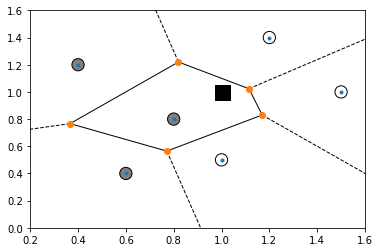

In [37]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x_train)
voronoi_plot_2d(vor)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")

plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('voronoi.eps')
plt.show()

## Região de decisão

Selecionando dois atributos, podemos visualizar a região de decisão. Para graficar a região de separação, precisamos instalar a bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/<br>
Pode ser usado: conda install -c conda-forge mlxtend

Para o método k-vizinhos mais próximos:

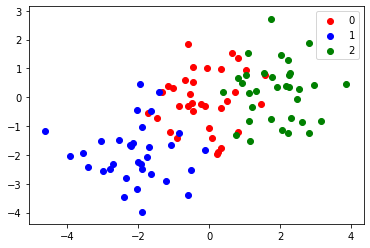

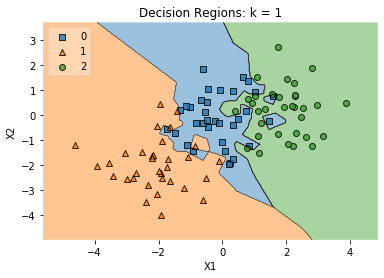

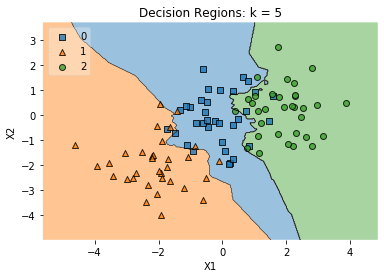

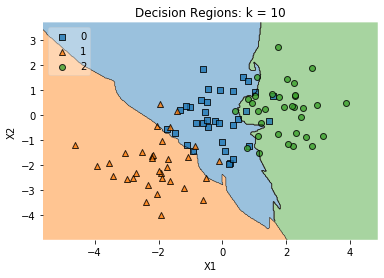

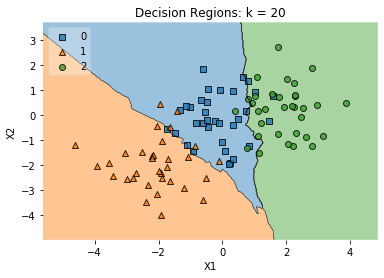

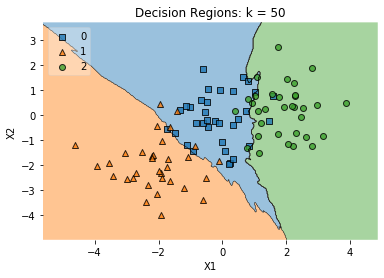

In [38]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('knn_ex.eps')
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10,20,int(n_samples/2)]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    #plt.savefig('knn_' + str(k)+'.eps')
    plt.show()

## Escolha do melhor $k$

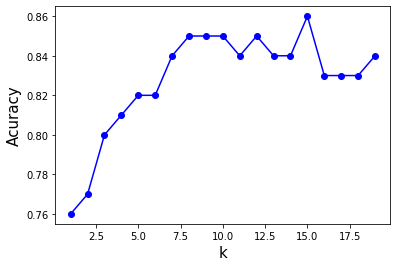

Melhor k: 15


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from pandas import DataFrame
from sklearn.model_selection import cross_validate


# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, X, y, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.figure(figsize=(6,4))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

## Métricas

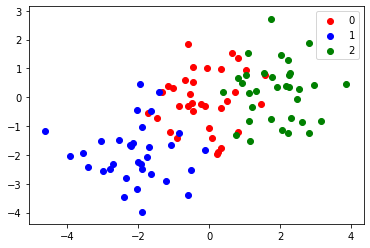

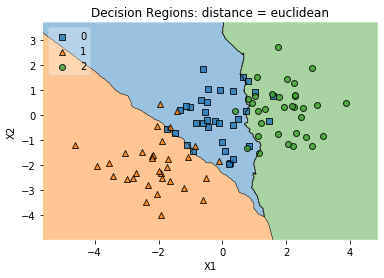

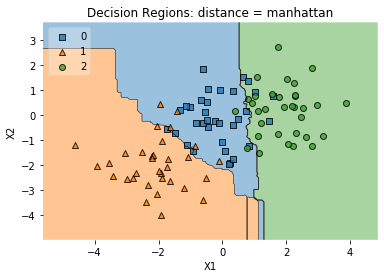

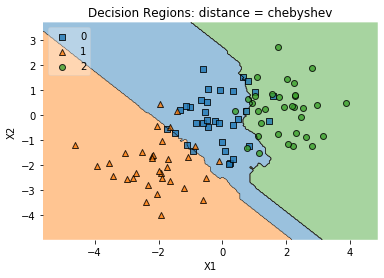

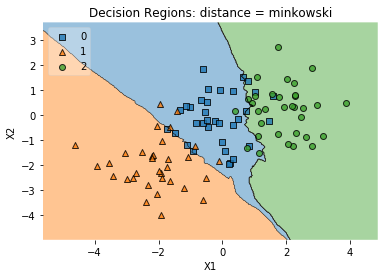

In [40]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 21
for d in vm:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: distance = '+ d)
    #plt.savefig('knn_' + str(d)+'.eps')
    plt.show()

## Classificação de dados

Vamos inicialmente ler os dados:

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de linhas: 310  colunas:  7


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


Vamos construir as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

Convertemos os dados para o formato Numpy para facilitar a sua manipulação. 

In [2]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Vamos normalizar os dados, de modo a evitar o efeito da escala dos atributos.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 1.14603667e-16 -4.58414668e-17 -3.66731735e-16 -5.73018335e-17
  3.55271368e-16 -6.87622002e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1.]


Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [5]:
from sklearn.model_selection import train_test_split
p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

A partir desse conjunto de dados, podemos realizar a classificação.

Para realizar a classificação, vamos usar a biblioteca scikit-learn (https://scikit-learn.org). É possível implementar o método usando métricas diferentes da Euclidiana, como as que podem ser vistas em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

Vamos ajustar o modelo. Inicialmente, vamos considerar o método hold-out para selecionar o conjunto de teste e treinamento, que seleciona uma fração p de elementos para o conjunto de teste e (1-p), para treinamento. A seleção do modelo será feita mais adiante usando validação cruzada.

Relizando a classificação pelo método dos k-vizinhos:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

O erro na classificação pode ser quantificado pela medida de acurácia.

In [7]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7526881720430108


Notem quem o valor da acurácia depende do número de vizinhos $k$. Podemos selecionar o melhor valor de $k$ usando validação cruzada. 

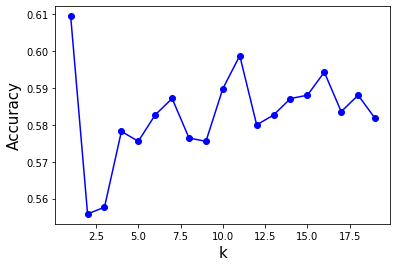

Melhor k: 1


In [48]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

Usando todo o conjunto de treinamento, podemos ajustar o modelo e realizar a classificação no conjunto de teste.

In [49]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.625


Código completo para a classificação da flor iris é mostrado a seguir.

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Realiza a leitura dos dados
data = pd.read_csv('data/iris.csv', header=(0))
#classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

# Transforma os dados para o numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
# Normalizacao
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
# Seleciona os conjuntos de treinamento e teste
p = 0.7 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(X_test) 
# verifica a acurácia da predicao
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 1.0


### Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Em um mesmo gráfico, mostre a acurácia e função de k, para o método k-vizinhos, considerando as bases Iris, BreastCancer e Vehicle.

2 - Considerando a base de dados Vehicle, projete os dados em duas dimensões usando PCA e mostre as regiões de separação como feito acima.

3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare as regiões de separaçào para os métodos k-vizinhos usando diferentes valor de $k$.

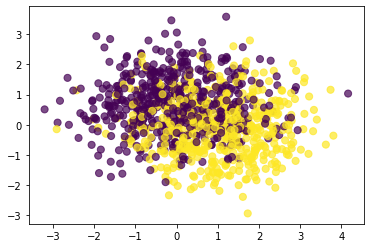

In [53]:
from sklearn import datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)